<a href="https://colab.research.google.com/github/lightofhappiness/UAS_BasisData/blob/main/UTS_Bigdata.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
import requests
import os

In [ ]:
file_url = "https://data.transportation.gov/api/views/keg4-3bc2/rows.csv?accessType=DOWNLOAD"
local_filename = "Border_Crossing_Entry_Data.csv"

if not os.path.exists(local_filename):
  print(f"File '{local_filename}' not found. Downloading...")

  !wget -q -O '{local_filename}' '{file_url}'
  print(f"Download complete. File saved as '{local_filename}'.")
else:
  print(f"File '{local_filename}' already exists. Skipping download.")


File 'Border_Crossing_Entry_Data.csv' not found. Downloading...
Download complete. File saved as 'Border_Crossing_Entry_Data.csv'.


In [ ]:
# 1. Load dan Preprocessing Data
# Main flow (simulasi topologi Storm)
def load_and_preprocess(path):
    df = pd.read_csv(path)
    df['Date'] = pd.to_datetime(df['Date'])
    df['Year'] = df['Date'].dt.year
    df['Month'] = df['Date'].dt.month
    df_grouped = df.groupby(['Date', 'Year', 'Month'])['Value'].sum().reset_index()
    df_grouped.rename(columns={'Value': 'TotalCrossings'}, inplace=True)
    return df_grouped

In [ ]:
# 2. Deteksi Anomali dengan Z-Score
def detect_anomalies(df):
    mean = df['TotalCrossings'].mean()
    std = df['TotalCrossings'].std()
    df['Z_Score'] = (df['TotalCrossings'] - mean) / std
    df['Anomaly'] = df['Z_Score'].apply(lambda z: abs(z) > 3)
    # Return the full dataframe including Year and Month columns


     # Plot hasil deteksi anomali
    plt.figure(figsize=(15, 5))
    plt.plot(df['Date'], df['TotalCrossings'], label='Total Crossings')
    plt.scatter(df[df['Anomaly']]['Date'], df[df['Anomaly']]['TotalCrossings'], color='red', label='Anomaly')
    plt.xlabel("Tanggal")
    plt.ylabel("Total Penyebrangan")
    plt.title("Deteksi Anomali dengan Z-Score")
    plt.legend()
    plt.grid(True)
    plt.tight_layout()
    plt.show()

In [ ]:
# 3. Analisis Musiman
def plot_seasonal_trends(df):
    df_monthly = df.groupby(['Year', 'Month'])['TotalCrossings'].mean().reset_index()
    bins = [(1996, 2002), (2003, 2009), (2010, 2016), (2017, 2025)]
    month_labels = ["Jan", "Feb", "Mar", "Apr", "Mei", "Jun", "Jul", "Agu", "Sep", "Okt", "Nov", "Des"]

    plt.figure(figsize=(15, 10))
    for i, (start, end) in enumerate(bins, 1):
        subset = df_monthly[(df_monthly['Year'] >= start) & (df_monthly['Year'] <= end)]
        plt.subplot(2, 2, i)
        for year in range(start, end + 1):
            yearly = subset[subset['Year'] == year]
            if not yearly.empty:
                plt.plot(yearly['Month'], yearly['TotalCrossings'], label=str(year))
        plt.xlabel("Bulan")
        plt.ylabel("Rata-rata Penyebrangan")
        plt.title(f"Pola Musiman ({start}-{end})")
        plt.xticks(range(1, 13), month_labels)
        plt.legend()
    plt.tight_layout()
    plt.show()

In [ ]:
# 4. Prediksi dengan Linear Regression
def predict_trend(df):
    yearly_df = df.groupby('Year')['TotalCrossings'].sum().reset_index()
    X = yearly_df[['Year']]
    y = yearly_df['TotalCrossings']
    model = LinearRegression().fit(X, y)

    # Prediksi 5 tahun ke depan
    future_years = pd.DataFrame({'Year': list(range(X['Year'].max() + 1, X['Year'].max() + 6))})
    future_preds = model.predict(future_years)

    # Visualisasi
    plt.figure(figsize=(10, 5))
    plt.plot(X['Year'], y, label='Historis', marker='o')
    plt.plot(future_years['Year'], future_preds, label='Prediksi', linestyle='--', marker='x')
    plt.xlabel("Tahun")
    plt.ylabel("Total Penyebrangan")
    plt.title("Prediksi Penyebrangan Tahunan")
    plt.legend()
    plt.grid(True)
    plt.show()

In [ ]:
def plot_seasonal_trends_all_year(df):
    # Group by Year and Month and calculate the mean TotalCrossings
    df_pandas = df.groupby(['Year', 'Month'])['TotalCrossings'].mean().reset_index()
    df_pandas.rename(columns={'TotalCrossings': 'AvgCrossings'}, inplace=True)
    df_pandas.sort_values(by=['Year', 'Month'], inplace=True)


    plt.figure(figsize=(12, 6))
    month_labels = ["Jan", "Feb", "Mar", "Apr", "Mei", "Jun", "Jul", "Agu", "Sep", "Okt", "Nov", "Des"]

    for year in sorted(df_pandas["Year"].unique()):
        yearly_data = df_pandas[df_pandas["Year"] == year]
        plt.plot(yearly_data["Month"], yearly_data["AvgCrossings"], label=str(year))

    plt.xlabel("Bulan")
    plt.ylabel("Rata-rata Penyebrangan")
    plt.title("Pola Musiman Penyebrangan (Gabungan Tahun)")
    plt.legend()
    plt.xticks(range(1, 13), labels=month_labels)  # Menampilkan label bulan

    # plt.tight_layout()
    plt.show()

<ipython-input-4-3c1134c01754>:5: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df['Date'] = pd.to_datetime(df['Date'])


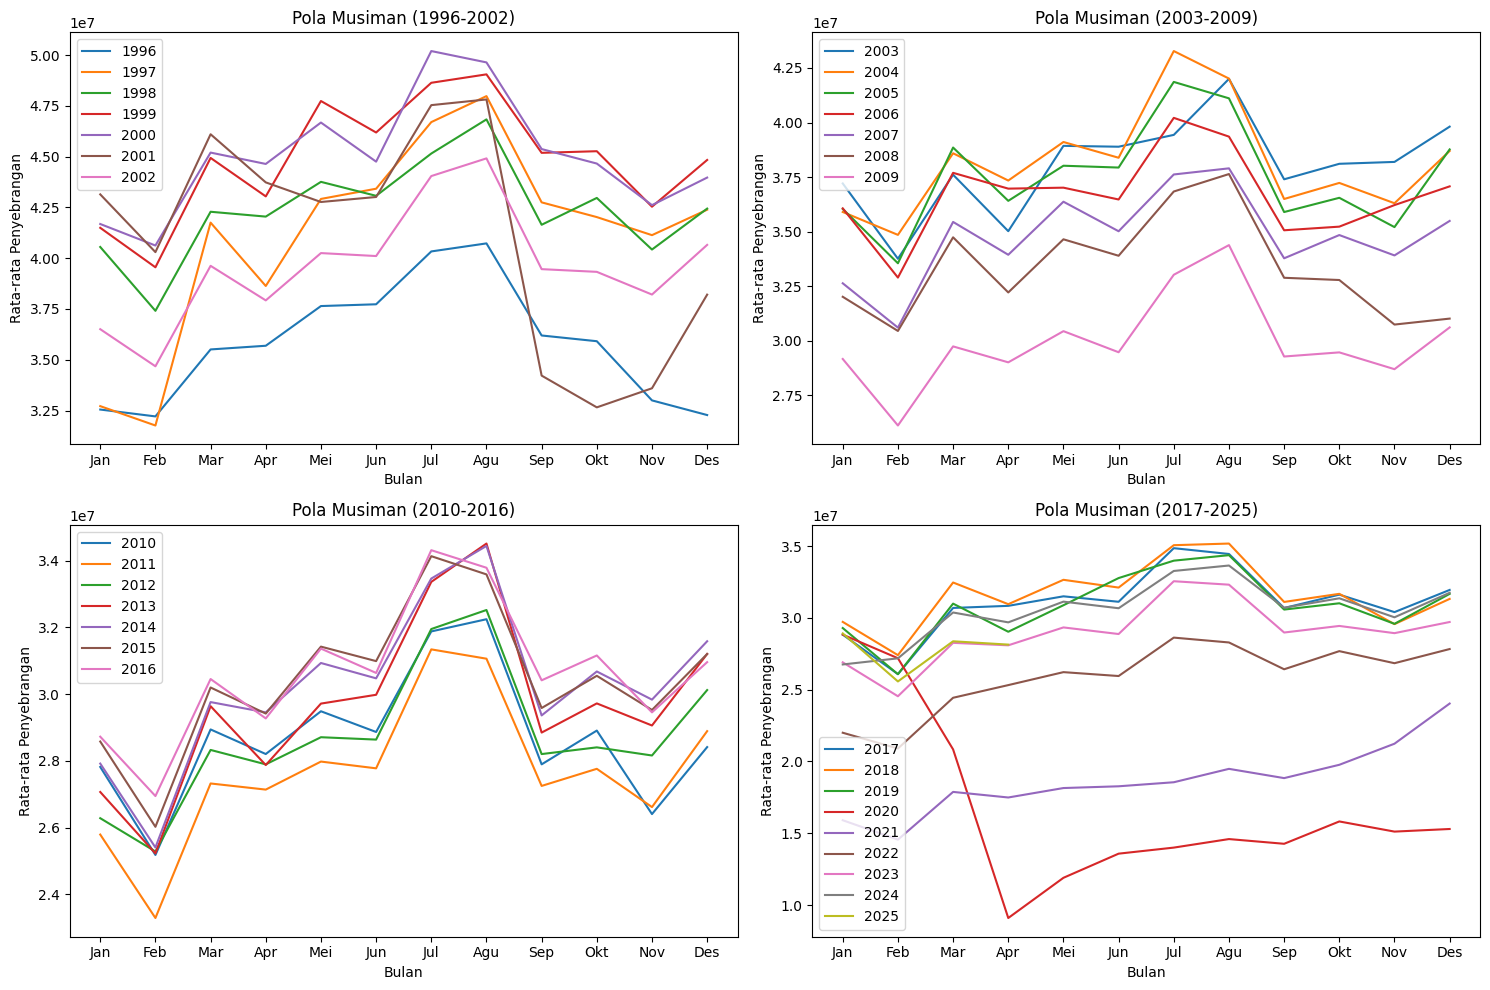

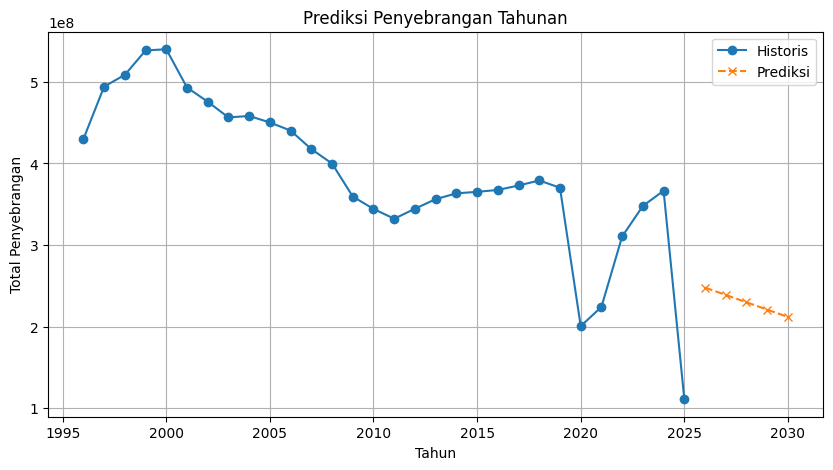

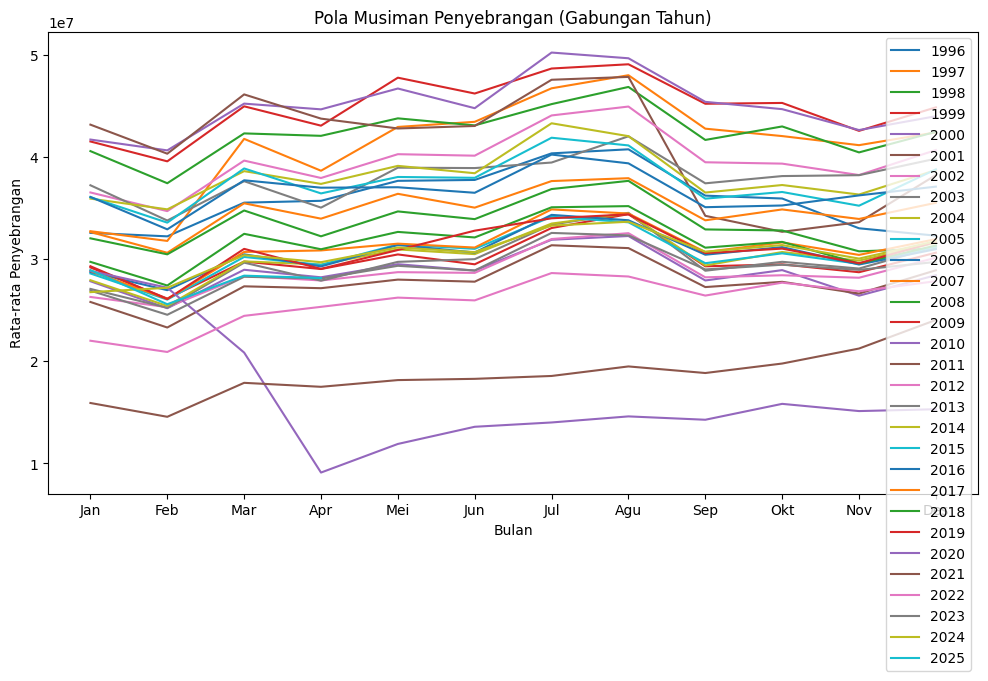

In [ ]:
def main():
    df = load_and_preprocess(local_filename)
    plot_seasonal_trends(df)
    predict_trend(df)
    plot_seasonal_trends_all_year(df)

# Eksekusi
if __name__ == '__main__':
    main()

<ipython-input-4-3c1134c01754>:5: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df['Date'] = pd.to_datetime(df['Date'])


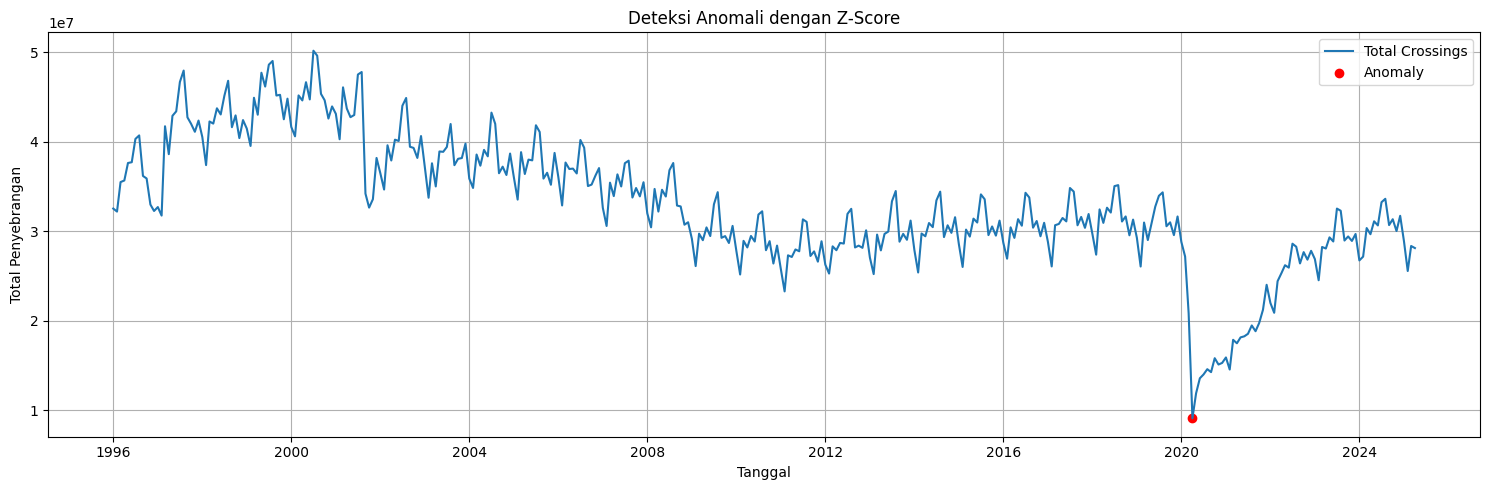

In [ ]:
def main():
    df = load_and_preprocess(local_filename)
    df = detect_anomalies(df)
    # Eksekusi
if __name__ == '__main__':
    main()